In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
# Carga el conjunto de datos
df = pd.read_csv('ML_cars.csv')
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
#modificamos las marcas mal escritas a traves de un diccionario
df[['Marca', 'Modelo']] = df['CarName'].str.split(' ', n=1, expand=True)
errados = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
correctos = ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(errados, correctos))

# Realizar el reemplazo basado en el diccionario
df['Marca'] = df['Marca'].replace(dicMarca)

In [55]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [58]:
y = df['price'].mean()

In [71]:
Categoria=[]
caro=0.0
barato=1.0
for precio in df['price']:
    if precio > y:
        Categoria.append(caro)
    else:
        Categoria.append(barato)
df['categoria_precio'] = Categoria

In [74]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo,categoria_precio
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,giulia,0.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,stelvio,0.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,Quadrifoglio,0.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls,0.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,100ls,0.0


In [110]:
# Elegir las características y el objetivo
features = ['horsepower', 'wheelbase', 'peakrpm', 'enginesize', 'boreratio', 'stroke', 'compressionratio']
target = ['price']

In [111]:
# Dividir en conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=0)

In [112]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [113]:
score = model.score(X_test, y_test)
print("Score:", score)
print("RMSE:", np.sqrt(score))

Score: 0.8347959680304051
RMSE: 0.9136716959775022


In [114]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [115]:
y_pred

array([[ 5417.05127741],
       [21313.48897285],
       [14486.02722956],
       [  707.8763236 ],
       [11082.74623837],
       [14128.62862962],
       [ 6520.3918881 ],
       [ 5545.02575497],
       [20897.77134411],
       [ 7535.10550212],
       [16712.81276877],
       [36313.84095039],
       [ 8090.82452627],
       [13776.0728027 ],
       [ 6859.3006267 ],
       [14128.62862962],
       [ 9495.0344225 ],
       [15744.71511085],
       [ 9619.68351087],
       [ 5545.02575497],
       [11200.85686825],
       [15887.30577031],
       [ 9495.0344225 ],
       [14128.62862962],
       [22374.04477094],
       [ 8094.389315  ],
       [ 6706.48422028],
       [17208.92804566],
       [ 6706.48422028],
       [ 6438.33397015],
       [ 9072.61422811],
       [10436.78083406],
       [18351.17341596],
       [ 9395.60375455],
       [ 6438.33397015],
       [27518.18107496],
       [ 9183.84757641],
       [17852.01329071],
       [ 6327.20387957],
       [36971.35616648],


In [121]:
np.shape(y_pred)
i = y_pred.reshape(-1,1)

ValueError: x and y must have same first dimension, but have shapes (143, 7) and (62, 1)

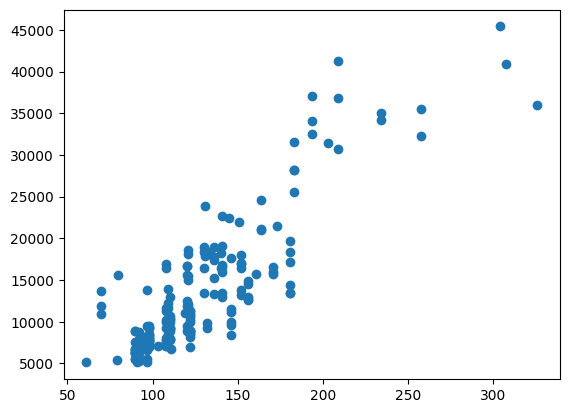

In [119]:
import pandas as pd
import matplotlib.pyplot as plt


# Crear el gráfico
plt.scatter(df['enginesize'], df["price"], label="Precio vs. tamaño del motor")
plt.plot(X_train, i)
plt.xlabel("Tamaño del motor (litros)")
plt.ylabel("Precio (dólares)")
plt.legend()

# Mostrar el gráfico
plt.show()

In [83]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state = 42)

In [84]:

X = df[['horsepower', 'wheelbase', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm']]
y = df['categoria_precio']

In [85]:
X = X.astype(float)

In [86]:
X.head()

,horsepower,wheelbase,enginesize,boreratio,stroke,compressionratio,peakrpm
0,111.0,88.6,130.0,3.47,2.68,9.0,5000.0
1,111.0,88.6,130.0,3.47,2.68,9.0,5000.0
2,154.0,94.5,152.0,2.68,3.47,9.0,5000.0
3,102.0,99.8,109.0,3.19,3.40,10.0,5500.0
4,115.0,99.4,136.0,3.19,3.40,8.0,5500.0


In [87]:
clf.fit(X.values, y.values)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [88]:
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0. 1.]
2
7
[0.         0.12122293 0.78963927 0.         0.08913779 0.
 0.        ]


In [90]:
y_predict = clf.predict(X.values)
y_predict

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [91]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_predict))

0.8780487804878049


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: X has 2 features, but DecisionTreeClassifier is expecting 7 features as input.

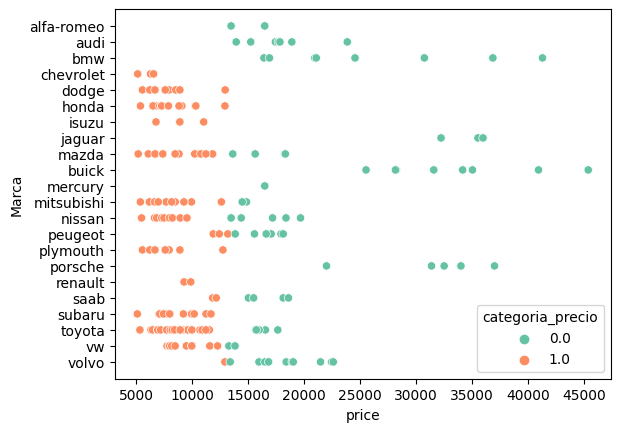

In [109]:
import seaborn as sns


plt.legend().remove()

xlim = (sns.scatterplot(y = df['Marca'], x = df['price'], hue= y, palette='Set2')).get_xlim()
# ylim = (sns.scatterplot(x = X.iloc[:,0], y = df['categoria_precio'], hue= y, palette='Set2')).get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

In [ ]:
plt.figure(figsize= (10,6))
plt.()

1. Regresión Lineal

Importa las bibliotecas necesarias: Python ofrece varias bibliotecas para manejar y procesar datos (como pandas) y construir modelos de machine learning (como scikit-learn).

Carga los datos: Usando pandas.read_csv(), se carga el conjunto de datos en un DataFrame.

Selecciona las variables relevantes: En este caso, se selecciona 'horsepower', 'peakrpm' y 'enginesize' como características (variables de entrada) y 'price' como el objetivo (variable de salida) que desea predecir.

Divide los datos: Los datos se dividen en un conjunto de entrenamiento y de prueba usando la función train_test_split(). Asegúrate de que 'test_size' esté configurado para determinar la proporción de datos que deseas dividir para la prueba.

Inicializa y entrena el modelo: Se crea una instancia del modelo LinearRegression() y se entrena con el conjunto de datos de entrenamiento utilizando la función fit().

Realiza las predicciones: Se usa el modelo entrenado para hacer predicciones en el conjunto de datos de prueba con la función predict().

Evalúa el rendimiento del modelo: Se usa la función mean_squared_error() para calcular el error cuadrático medio entre las predicciones y el valor real.